# Import csv files

## create .env

## Import library

In [ ]:
!pip install python-dotenv

In [ ]:
!pip install seaborn

In [49]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import psycopg2
import pandas as pd
from psycopg2 import sql
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

## Data import

In [50]:
# Load environment variables
load_dotenv(override=True)

# Test if variables are loaded
db_host = os.getenv('DB_HOST')
db_name = os.getenv('DB_NAME')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_port = os.getenv('DB_PORT')
database_url = os.getenv("DATABASE_URL")
secret_key = os.getenv("SECRET_KEY")
debug_mode = os.getenv("DEBUG")

# file path
supply_chain_file_path = "../resources/DataCoSupplyChainDataset.csv"
access_log_file_path = "../resources/tokenized_access_logs.csv"

# print("✓ Environment variables loaded:")
# print(f"DB_HOST: {os.getenv('DB_HOST')}")
# print(f"DB_NAME: {os.getenv('DB_NAME')}")
# print(f"DB_USER: {os.getenv('DB_USER')}")
# print(f"DB_PASSWORD: {os.getenv('DB_PASSWORD')}")
# print(f"DB_PORT: {os.getenv('DB_PORT')}")
# print(f"Database URL: {database_url}")
# print(f"Secret Key: {secret_key}")
# print(f"Debug Mode: {debug_mode}")

## Create Tables and Import Data Using Python

In [51]:
conn_params = {
    'host':     db_host,
    'database': db_name,
    'user':     db_user,
    'password': db_password,
    'port':     db_port
}

try:
    conn = psycopg2.connect(**conn_params)
    conn.autocommit = True
    cursor = conn.cursor()
    # Create database
    cursor.execute("CREATE DATABASE final_project;")
    print("Database created successfully!")
    
except psycopg2.errors.DuplicateDatabase:
    print("Database already exists")

except Exception as e:
    print(f"Error: {e}")

finally:
    cursor.close()
    conn.close()

Database already exists


## Create Tables from Your CSV Files

In [52]:
# Connect to your project database
conn_params['database'] = os.getenv('DB_NAME')

try:
    conn = psycopg2.connect(**conn_params)
    cursor = conn.cursor()
    
    # Create table with proper data types
    create_table_query = """
    CREATE TABLE IF NOT EXISTS supply_chain_df (
        type VARCHAR(50),
        days_for_shipping_real INTEGER,
        days_for_shipment_scheduled INTEGER,
        benefit_per_order NUMERIC(10,2),
        sales_per_customer NUMERIC(10,2),
        delivery_status VARCHAR(50),
        late_delivery_risk INTEGER,
        category_id INTEGER,
        category_name VARCHAR(100),
        customer_city VARCHAR(100),
        customer_country VARCHAR(100),
        customer_email VARCHAR(150),
        customer_fname VARCHAR(100),
        customer_id INTEGER,
        customer_lname VARCHAR(100),
        customer_password VARCHAR(100),
        customer_segment VARCHAR(50),
        customer_state VARCHAR(100),
        customer_street VARCHAR(200),
        customer_zipcode VARCHAR(20),
        department_id INTEGER,
        department_name VARCHAR(100),
        latitude NUMERIC(10,6),
        longitude NUMERIC(10,6),
        market VARCHAR(50),
        order_city VARCHAR(100),
        order_country VARCHAR(100),
        order_customer_id INTEGER,
        order_date DATE,
        order_id INTEGER PRIMARY KEY,
        order_item_cardprod_id INTEGER,
        order_item_discount NUMERIC(10,2),
        order_item_discount_rate NUMERIC(5,4),
        order_item_id INTEGER,
        order_item_product_price NUMERIC(10,2),
        order_item_profit_ratio NUMERIC(5,4),
        order_item_quantity INTEGER,
        sales NUMERIC(10,2),
        order_item_total NUMERIC(10,2),
        order_profit_per_order NUMERIC(10,2),
        order_region VARCHAR(50),
        order_state VARCHAR(100),
        order_status VARCHAR(50),
        order_zipcode VARCHAR(20),
        product_card_id INTEGER,
        product_category_id INTEGER,
        product_description TEXT,
        product_image VARCHAR(200),
        product_name VARCHAR(200),
        product_price NUMERIC(10,2),
        product_status INTEGER,
        shipping_date DATE,
        shipping_mode VARCHAR(50)
    );
    """
    
    cursor.execute(create_table_query)
    conn.commit()
    print("✓ Table created successfully!")
    
except Exception as e:
    print(f"Error: {e}")
    conn.rollback()
    
finally:
    cursor.close()
    conn.close()


✓ Table created successfully!


## Import DataCoSupplyChainDataset


In [55]:
conn = psycopg2.connect(**conn_params)
cur = conn.cursor()
query = "SELECT * FROM supply_chain_df;"
supply_chain_df = pd.read_sql_query(query, conn)
supply_chain_df.head()

/var/folders/11/_4nf9vcd381d35kpvnpx8jph0000gn/T/ipykernel_15866/1500381521.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  supply_chain_df = pd.read_sql_query(query, conn)


,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_email,customer_fname,customer_id,customer_lname,customer_password,customer_segment,customer_state,customer_street,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_dateorders,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_description,product_image,product_name,product_price,product_status,shipping_date_dateorders,shipping_mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## Import tokenized_access_logs

In [9]:
# Connection parameters

try:
    conn = psycopg2.connect(**conn_params)
    cursor = conn.cursor()
    
    # CREATE TABLE SQL statement
    create_table_sql = """
    CREATE TABLE IF NOT EXISTS access_logs (
        product VARCHAR(200),
        category VARCHAR(100),
        date DATE,
        month VARCHAR(20),
        hour TIME,
        department VARCHAR(100),
        ip VARCHAR(50),
        url TEXT
    );
    """
    
    cursor.execute(create_table_sql)
    conn.commit()
    print("✓ Table created successfully!")
    
except Exception as e:
    print(f"Error: {e}")
    conn.rollback()
finally:
    cursor.close()
    conn.close()


✓ Table created successfully!


In [ ]:
query = "SELECT * FROM access_logs;"
access_log_df = pd.read_sql_query(query, conn)
access_log_df.head()

/var/folders/11/_4nf9vcd381d35kpvnpx8jph0000gn/T/ipykernel_15866/2448697259.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  access_log_df = pd.read_sql_query(query, conn)


,product,category,date,month,hour,department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


## General EDA

In [59]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [60]:
supply_chain_df.describe()

,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_zipcode,product_card_id,product_category_id,product_price,product_status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,1999.989990,0.0


In [61]:
supply_chain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   type                         180519 non-null  object 
 1   days_for_shipping_real       180519 non-null  int64  
 2   days_for_shipment_scheduled  180519 non-null  int64  
 3   benefit_per_order            180519 non-null  float64
 4   sales_per_customer           180519 non-null  float64
 5   delivery_status              180519 non-null  object 
 6   late_delivery_risk           180519 non-null  int64  
 7   category_id                  180519 non-null  int64  
 8   category_name                180519 non-null  object 
 9   customer_city                180519 non-null  object 
 10  customer_country             180519 non-null  object 
 11  customer_email               180519 non-null  object 
 12  customer_fname               180519 non-null  object 
 13 

In [62]:
np.sum(supply_chain_df.isna())

/Users/tetsuya/.pyenv/versions/3.13.7/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


type                                0
days_for_shipping_real              0
days_for_shipment_scheduled         0
benefit_per_order                   0
sales_per_customer                  0
delivery_status                     0
late_delivery_risk                  0
category_id                         0
category_name                       0
customer_city                       0
customer_country                    0
customer_email                      0
customer_fname                      0
customer_id                         0
customer_lname                      8
customer_password                   0
customer_segment                    0
customer_state                      0
customer_street                     0
customer_zipcode                    3
department_id                       0
department_name                     0
latitude                            0
longitude                           0
market                              0
order_city                          0
order_countr

## Payment type perspective analysis

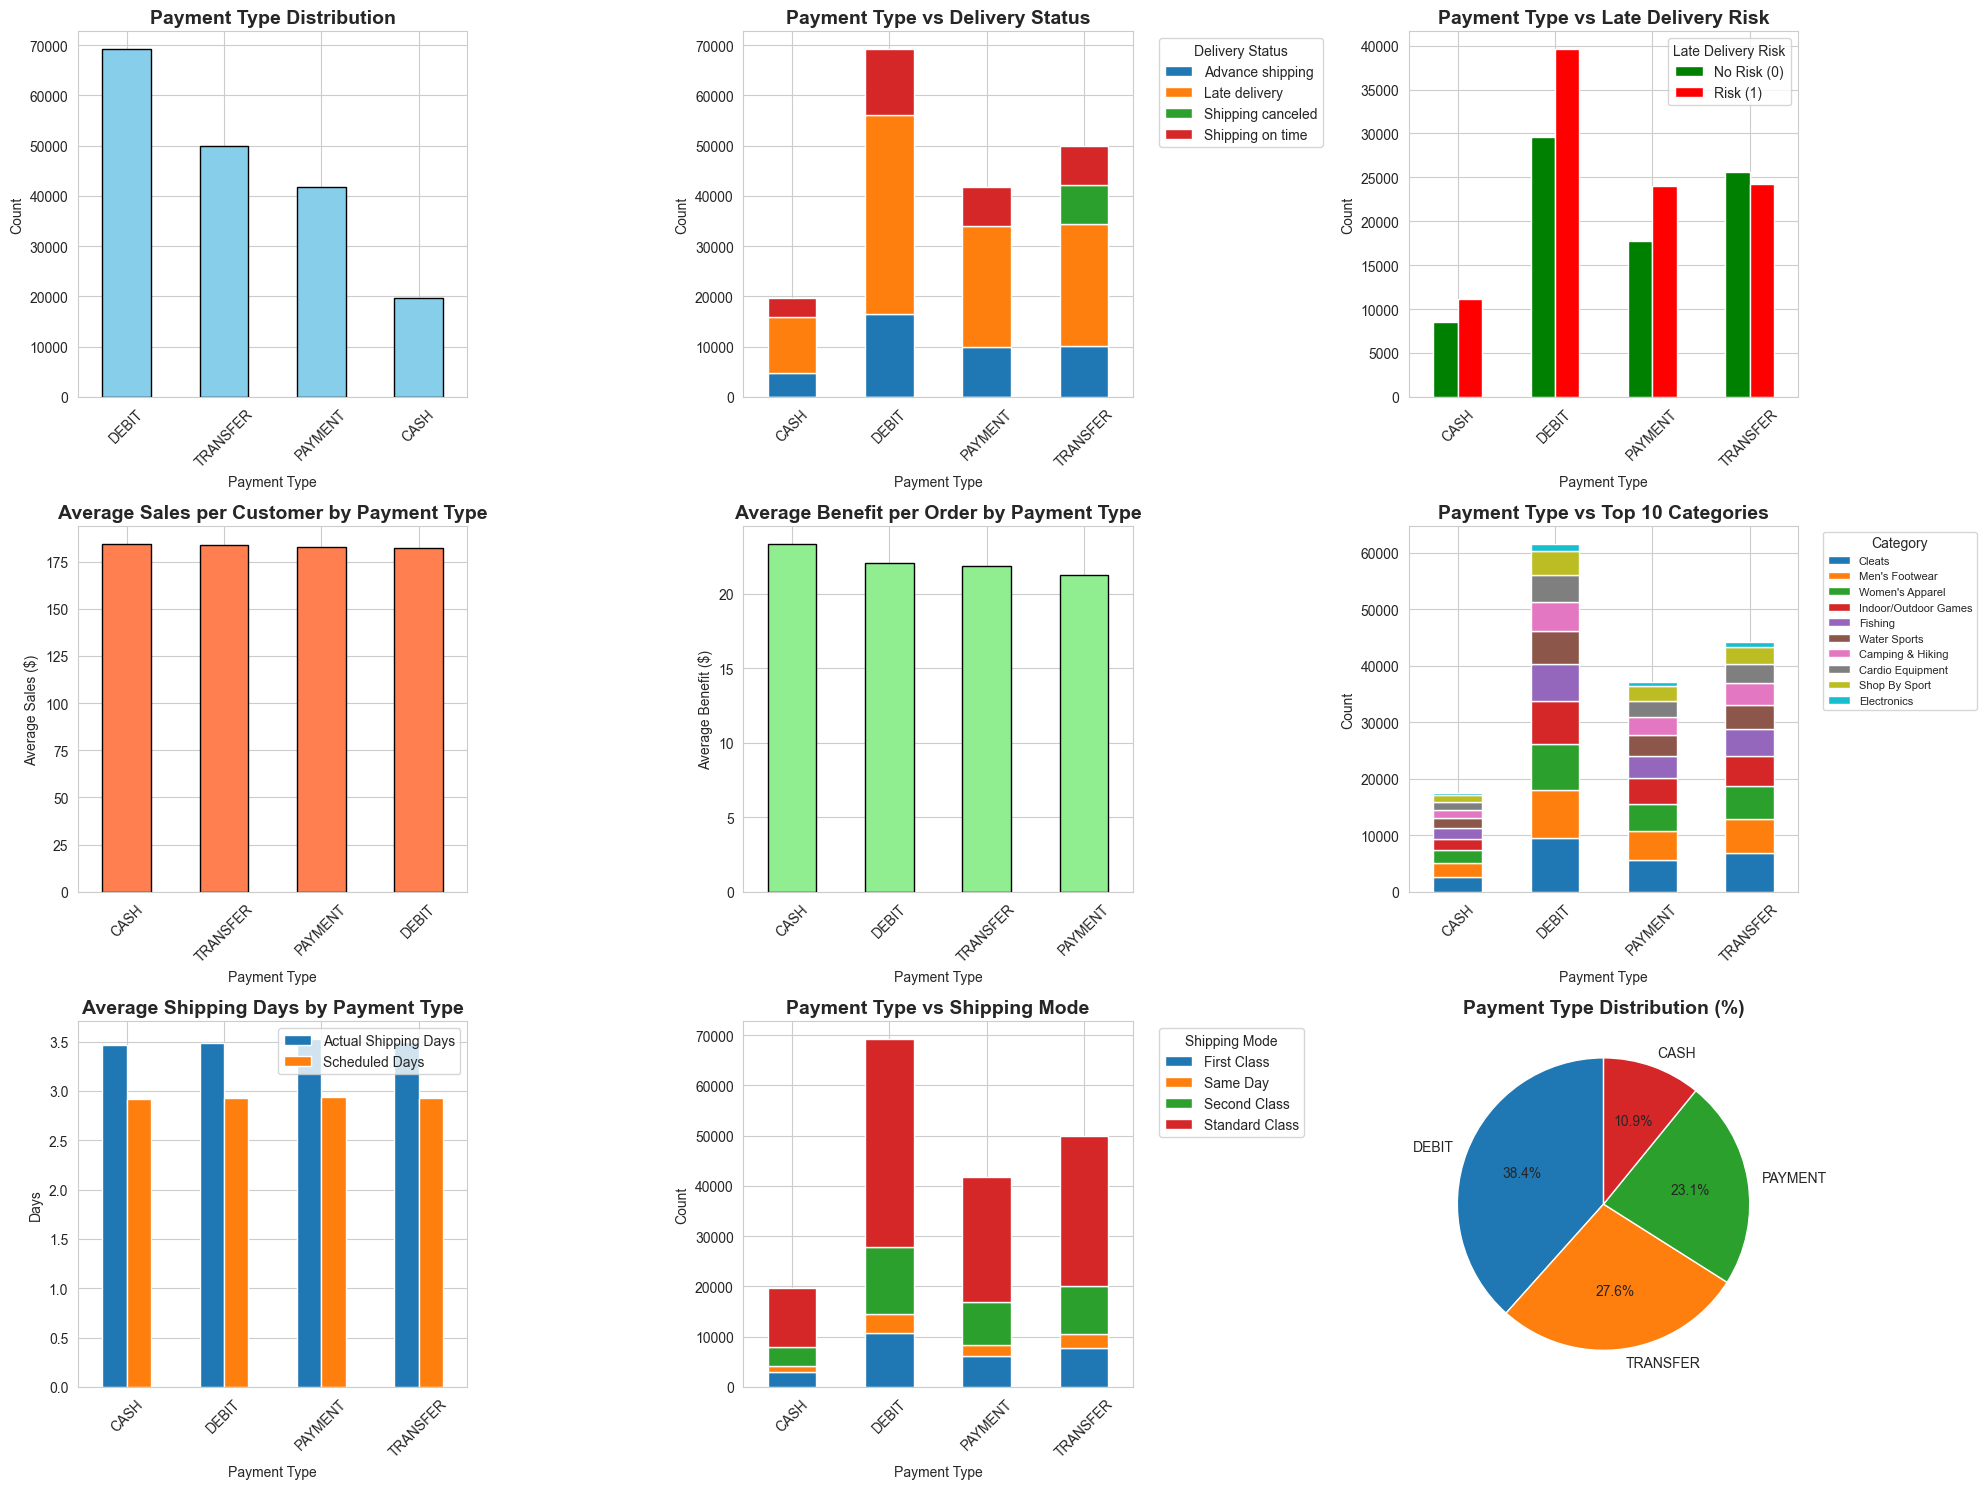

In [63]:


# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# 1. Payment Type Distribution
ax1 = plt.subplot(3, 3, 1)
type_counts = supply_chain_df['type'].value_counts()
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Payment Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 2. Payment Type vs Delivery Status
ax2 = plt.subplot(3, 3, 2)
payment_delivery = pd.crosstab(supply_chain_df['type'], supply_chain_df['delivery_status'])
payment_delivery.plot(kind='bar', stacked=True, ax=ax2)
plt.title('Payment Type vs Delivery Status', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.legend(title='Delivery Status', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# 3. Payment Type vs Late Delivery Risk
ax3 = plt.subplot(3, 3, 3)
payment_risk = pd.crosstab(supply_chain_df['type'], supply_chain_df['late_delivery_risk'])
payment_risk.plot(kind='bar', ax=ax3, color=['green', 'red'])
plt.title('Payment Type vs Late Delivery Risk', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', labels=['No Risk (0)', 'Risk (1)'])
plt.xticks(rotation=45)

# 4. Average Sales per Customer by Payment Type
ax4 = plt.subplot(3, 3, 4)
avg_sales = supply_chain_df.groupby('type')['sales_per_customer'].mean().sort_values(ascending=False)
avg_sales.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Sales per Customer by Payment Type', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)

# 5. Average Benefit per Order by Payment Type
ax5 = plt.subplot(3, 3, 5)
avg_benefit = supply_chain_df.groupby('type')['benefit_per_order'].mean().sort_values(ascending=False)
avg_benefit.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Benefit per Order by Payment Type', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Average Benefit ($)')
plt.xticks(rotation=45)

# 6. Payment Type vs Category (Top 10)
ax6 = plt.subplot(3, 3, 6)
payment_category = pd.crosstab(supply_chain_df['type'], supply_chain_df['category_name'])
top_categories = supply_chain_df['category_name'].value_counts().head(10).index
payment_category[top_categories].plot(kind='bar', stacked=True, ax=ax6)
plt.title('Payment Type vs Top 10 Categories', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.xticks(rotation=45)

# 7. Average Shipping Days by Payment Type
ax7 = plt.subplot(3, 3, 7)
shipping_comparison = supply_chain_df.groupby('type')[['days_for_shipping_real', 'days_for_shipment_scheduled']].mean()
shipping_comparison.plot(kind='bar', ax=ax7)
plt.title('Average Shipping Days by Payment Type', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Days')
plt.legend(['Actual Shipping Days', 'Scheduled Days'])
plt.xticks(rotation=45)

# 8. Payment Type vs Shipping Mode
ax8 = plt.subplot(3, 3, 8)
payment_shipping = pd.crosstab(supply_chain_df['type'], supply_chain_df['shipping_mode'])
payment_shipping.plot(kind='bar', stacked=True, ax=ax8)
plt.title('Payment Type vs Shipping Mode', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.legend(title='Shipping Mode', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# 9. Payment Type Pie Chart
ax9 = plt.subplot(3, 3, 9)
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax9)
plt.title('Payment Type Distribution (%)', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

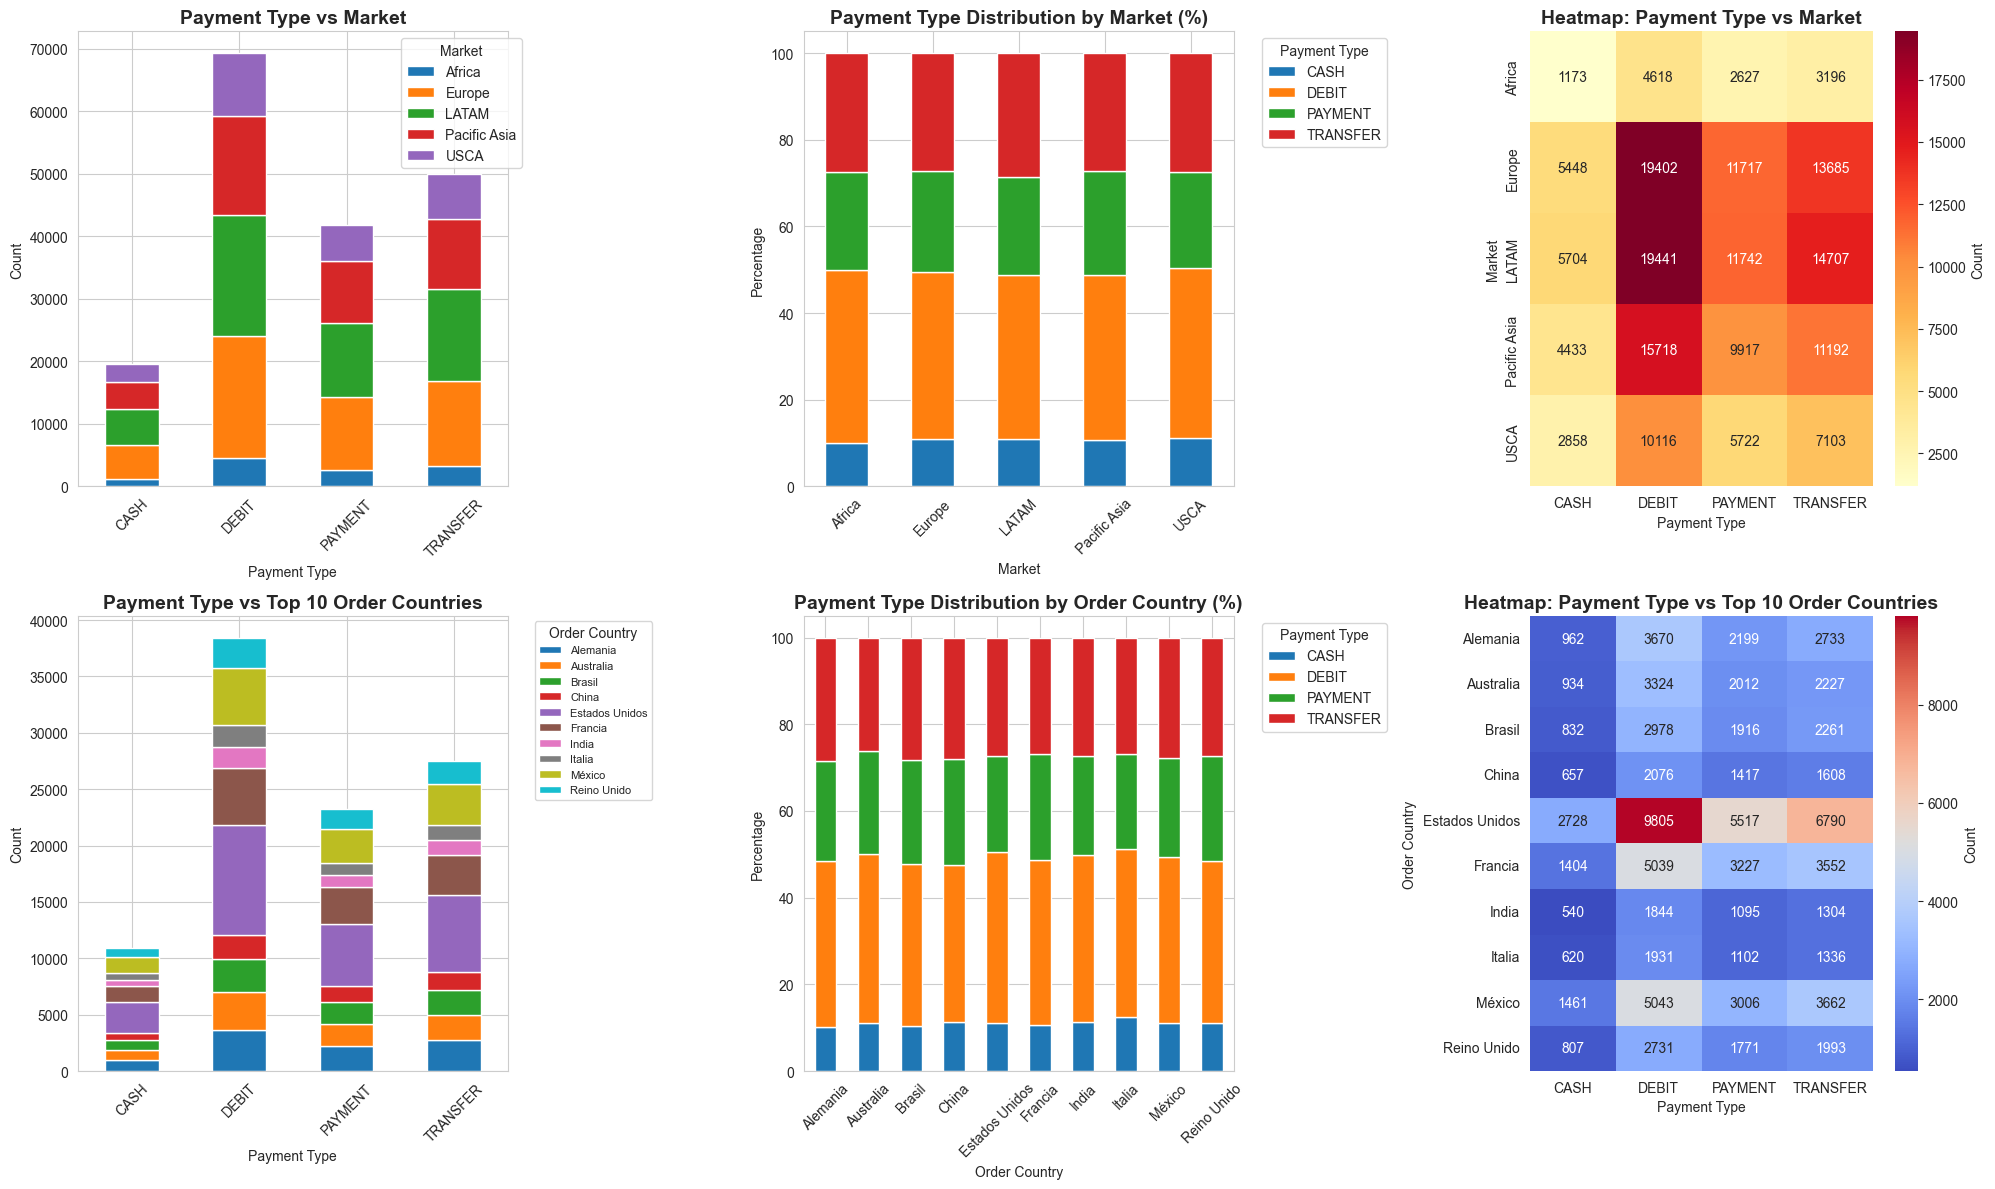

In [64]:
# Set style
sns.set_style("whitegrid")

# ============================================================================
# PAYMENT TYPE VS MARKET AND ORDER COUNTRY ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(20, 12))

# 1. Payment Type vs Market
ax1 = plt.subplot(2, 3, 1)
payment_market = pd.crosstab(supply_chain_df['type'], supply_chain_df['market'])
payment_market.plot(kind='bar', stacked=True, ax=ax1)
plt.title('Payment Type vs Market', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# 2. Payment Type Distribution by Market (%)
ax2 = plt.subplot(2, 3, 2)
payment_market_pct = pd.crosstab(supply_chain_df['market'],
                                  supply_chain_df['type'],
                                  normalize='index') * 100
payment_market_pct.plot(kind='bar', stacked=True, ax=ax2)
plt.title('Payment Type Distribution by Market (%)', fontsize=14, fontweight='bold')
plt.xlabel('Market')
plt.ylabel('Percentage')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# 3. Heatmap: Payment Type vs Market
ax3 = plt.subplot(2, 3, 3)
sns.heatmap(payment_market.T, annot=True, fmt='d', cmap='YlOrRd', ax=ax3, cbar_kws={'label': 'Count'})
plt.title('Heatmap: Payment Type vs Market', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Market')

# 4. Top 10 Order Countries by Payment Type
ax4 = plt.subplot(2, 3, 4)
top_countries = supply_chain_df['order_country'].value_counts().head(10).index
payment_country = pd.crosstab(supply_chain_df[supply_chain_df['order_country'].isin(top_countries)]['type'], 
                               supply_chain_df[supply_chain_df['order_country'].isin(top_countries)]['order_country'])
payment_country.plot(kind='bar', stacked=True, ax=ax4)
plt.title('Payment Type vs Top 10 Order Countries', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.legend(title='Order Country', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.xticks(rotation=45)

# 5. Payment Type Distribution by Top Order Countries (%)
ax5 = plt.subplot(2, 3, 5)
payment_country_pct = pd.crosstab(supply_chain_df[supply_chain_df['order_country'].isin(top_countries)]['order_country'],
                                   supply_chain_df[supply_chain_df['order_country'].isin(top_countries)]['type'],
                                   normalize='index') * 100
payment_country_pct.plot(kind='bar', stacked=True, ax=ax5)
plt.title('Payment Type Distribution by Order Country (%)', fontsize=14, fontweight='bold')
plt.xlabel('Order Country')
plt.ylabel('Percentage')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# 6. Heatmap: Payment Type vs Order Country
ax6 = plt.subplot(2, 3, 6)
sns.heatmap(payment_country.T, annot=True, fmt='d', cmap='coolwarm', ax=ax6, cbar_kws={'label': 'Count'})
plt.title('Heatmap: Payment Type vs Top 10 Order Countries', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Order Country')

plt.tight_layout()
plt.show()

## Late delivery perspective

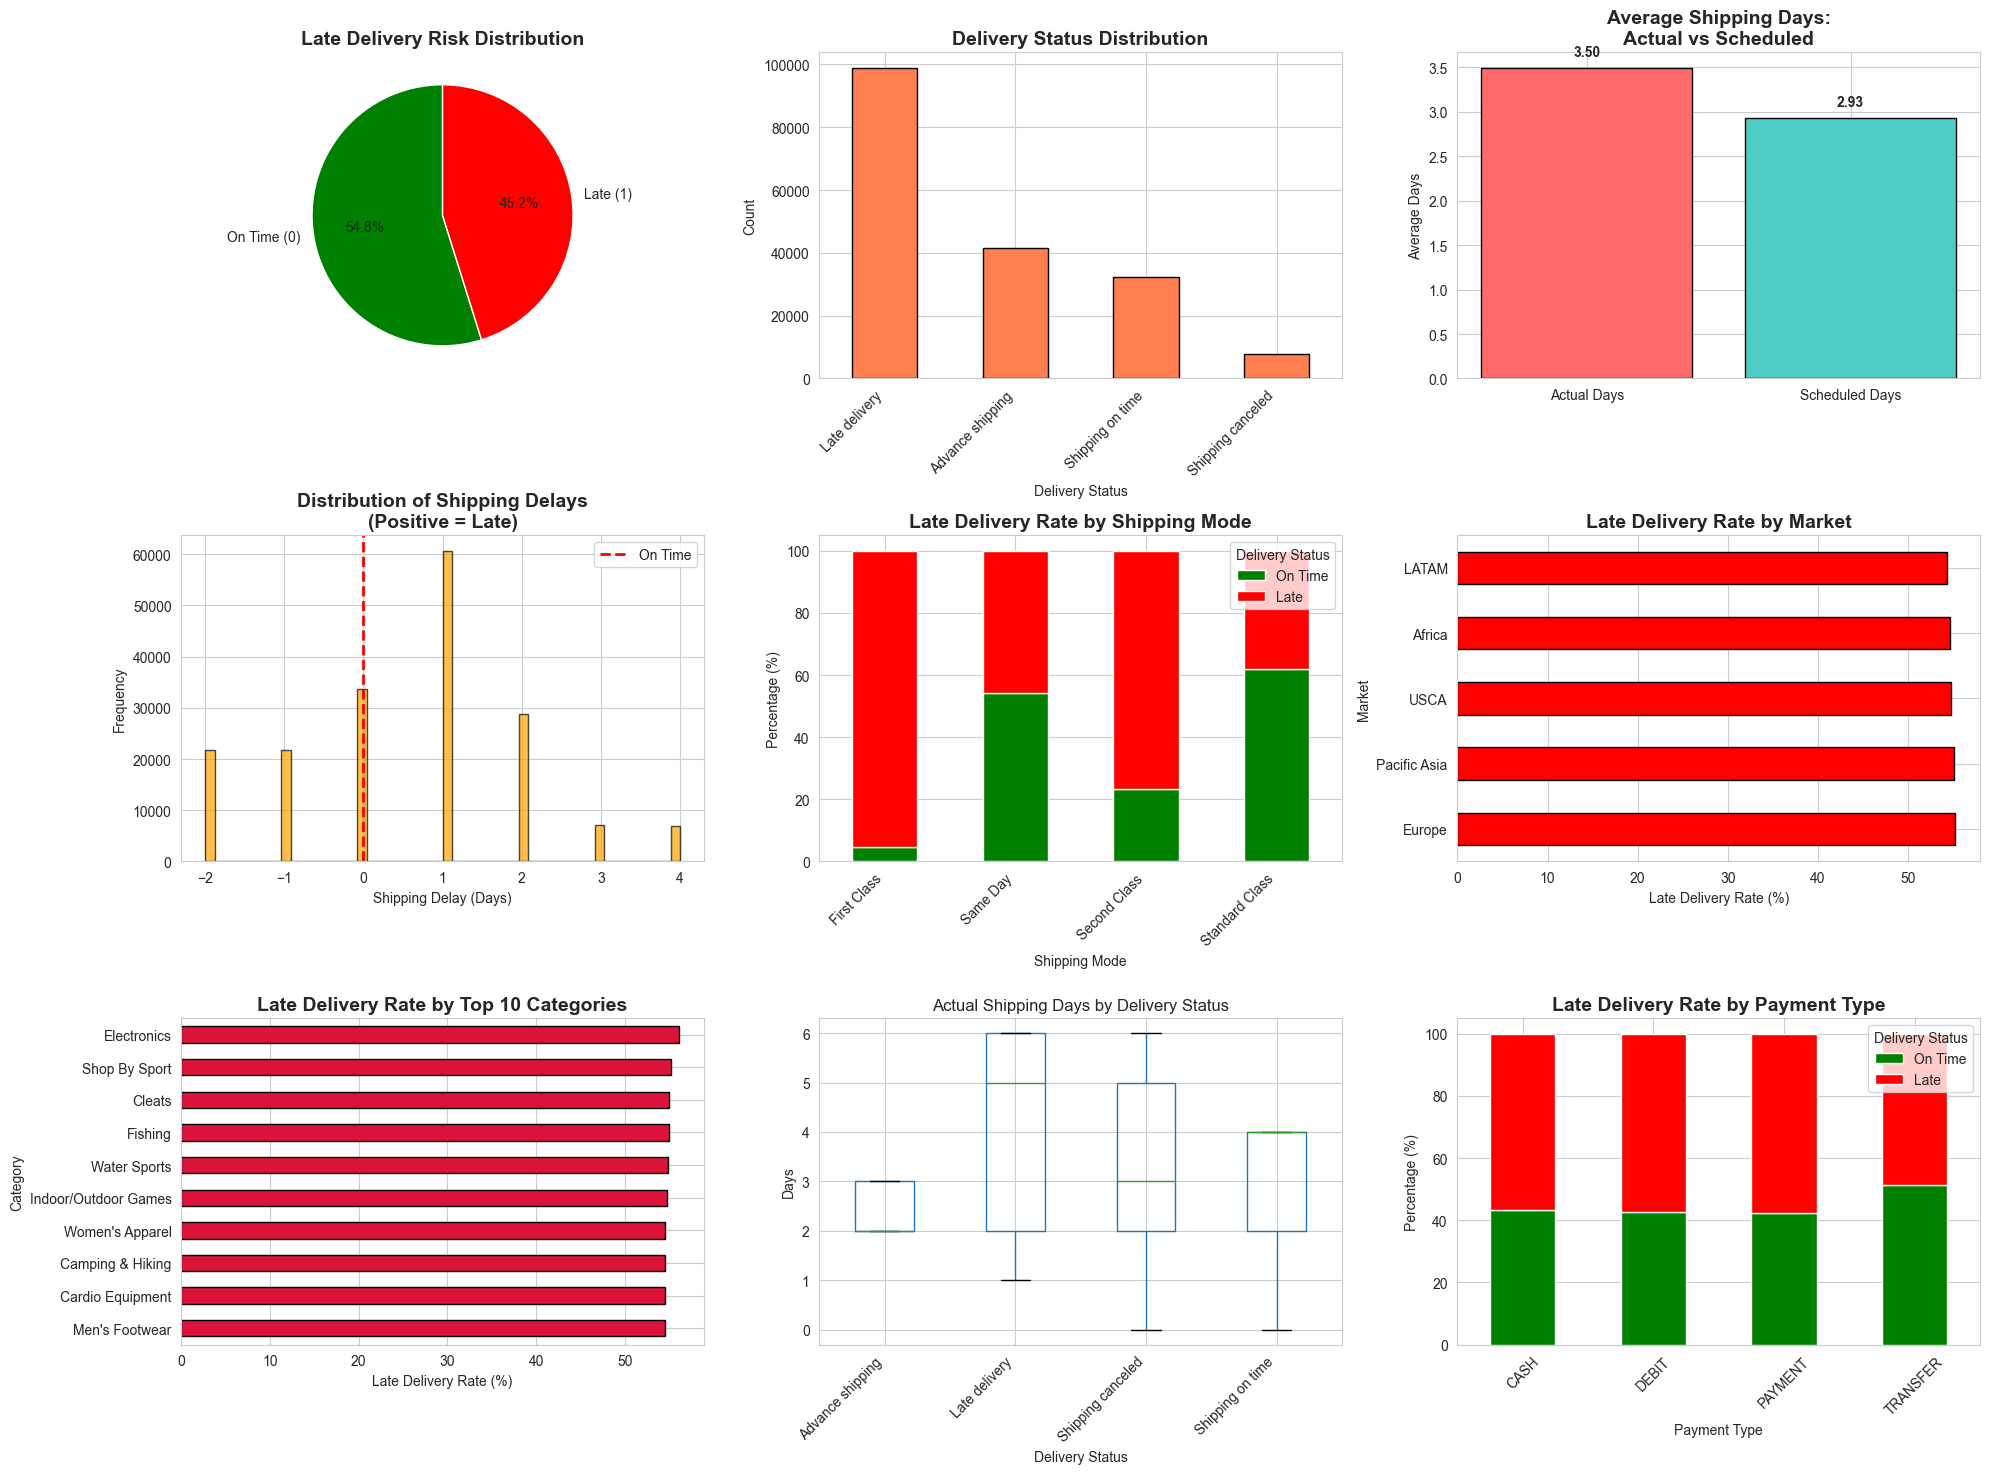

In [65]:


# ============================================================================
# SHIPPING DELAY ANALYSIS - OVERVIEW
# ============================================================================

fig = plt.figure(figsize=(20, 15))

# 1. Late Delivery Risk Distribution
ax1 = plt.subplot(3, 3, 1)
late_delivery_counts = supply_chain_df['late_delivery_risk'].value_counts()
colors = ['green', 'red']
plt.pie(late_delivery_counts.values, labels=['On Time (0)', 'Late (1)'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Late Delivery Risk Distribution', fontsize=14, fontweight='bold')

# 2. Delivery Status Distribution
ax2 = plt.subplot(3, 3, 2)
delivery_status_counts = supply_chain_df['delivery_status'].value_counts()
delivery_status_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Delivery Status Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# 3. Actual vs Scheduled Shipping Days
ax3 = plt.subplot(3, 3, 3)
avg_days = supply_chain_df[['days_for_shipping_real', 'days_for_shipment_scheduled']].mean()
x_pos = np.arange(len(avg_days))
plt.bar(x_pos, avg_days.values, color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
plt.xticks(x_pos, ['Actual Days', 'Scheduled Days'])
plt.ylabel('Average Days')
plt.title('Average Shipping Days:\nActual vs Scheduled', fontsize=14, fontweight='bold')
for i, v in enumerate(avg_days.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# 4. Shipping Delay (Real - Scheduled)
ax4 = plt.subplot(3, 3, 4)
supply_chain_df['shipping_delay'] = supply_chain_df['days_for_shipping_real'] - supply_chain_df['days_for_shipment_scheduled']
plt.hist(supply_chain_df['shipping_delay'], bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='On Time')
plt.xlabel('Shipping Delay (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Shipping Delays\n(Positive = Late)', fontsize=14, fontweight='bold')
plt.legend()

# 5. Late Delivery by Shipping Mode
ax5 = plt.subplot(3, 3, 5)
late_by_shipping = pd.crosstab(supply_chain_df['shipping_mode'], 
                                supply_chain_df['late_delivery_risk'], 
                                normalize='index') * 100
late_by_shipping.plot(kind='bar', stacked=True, ax=ax5, color=['green', 'red'])
plt.title('Late Delivery Rate by Shipping Mode', fontsize=14, fontweight='bold')
plt.xlabel('Shipping Mode')
plt.ylabel('Percentage (%)')
plt.legend(['On Time', 'Late'], title='Delivery Status')
plt.xticks(rotation=45, ha='right')

# 6. Late Delivery by Market
ax6 = plt.subplot(3, 3, 6)
late_by_market = pd.crosstab(supply_chain_df['market'], 
                              supply_chain_df['late_delivery_risk'], 
                              normalize='index') * 100
late_by_market[1].sort_values(ascending=False).plot(kind='barh', ax=ax6, color='red', edgecolor='black')
plt.xlabel('Late Delivery Rate (%)')
plt.ylabel('Market')
plt.title('Late Delivery Rate by Market', fontsize=14, fontweight='bold')

# 7. Late Delivery by Category (Top 10)
ax7 = plt.subplot(3, 3, 7)
top_categories = supply_chain_df['category_name'].value_counts().head(10).index
late_by_category = supply_chain_df[supply_chain_df['category_name'].isin(top_categories)].groupby('category_name')['late_delivery_risk'].mean() * 100
late_by_category.sort_values(ascending=True).plot(kind='barh', ax=ax7, color='crimson', edgecolor='black')
plt.xlabel('Late Delivery Rate (%)')
plt.ylabel('Category')
plt.title('Late Delivery Rate by Top 10 Categories', fontsize=14, fontweight='bold')

# 8. Actual Shipping Days by Delivery Status
ax8 = plt.subplot(3, 3, 8)
supply_chain_df.boxplot(column='days_for_shipping_real', by='delivery_status', ax=ax8)
plt.sca(ax8)
plt.xticks(rotation=45, ha='right')
ax8.set_title('Actual Shipping Days by Delivery Status')
ax8.set_xlabel('Delivery Status')
ax8.set_ylabel('Days')
plt.suptitle('')

# 9. Late Delivery by Payment Type
ax9 = plt.subplot(3, 3, 9)
late_by_payment = pd.crosstab(supply_chain_df['type'], 
                               supply_chain_df['late_delivery_risk'], 
                               normalize='index') * 100
late_by_payment.plot(kind='bar', stacked=True, ax=ax9, color=['green', 'red'])
plt.title('Late Delivery Rate by Payment Type', fontsize=14, fontweight='bold')
plt.xlabel('Payment Type')
plt.ylabel('Percentage (%)')
plt.legend(['On Time', 'Late'], title='Delivery Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [66]:
# ============================================================================
# DETAILED SHIPPING DELAY ANALYSIS
# ============================================================================

print("=" * 100)
print("SHIPPING DELAY ANALYSIS SUMMARY")
print("=" * 100)

# Overall statistics
total_orders = len(supply_chain_df)
late_orders = supply_chain_df['late_delivery_risk'].sum()
late_rate = (late_orders / total_orders) * 100

print(f"\nTotal Orders: {total_orders:,}")
print(f"Late Deliveries: {late_orders:,} ({late_rate:.2f}%)")
print(f"On-Time Deliveries: {total_orders - late_orders:,} ({100 - late_rate:.2f}%)")

print(f"\nAverage Actual Shipping Days: {supply_chain_df['days_for_shipping_real'].mean():.2f}")
print(f"Average Scheduled Shipping Days: {supply_chain_df['days_for_shipment_scheduled'].mean():.2f}")
print(f"Average Delay: {supply_chain_df['shipping_delay'].mean():.2f} days")

# Statistics by delivery status
print("\n" + "=" * 100)
print("STATISTICS BY DELIVERY STATUS")
print("=" * 100)

for status in supply_chain_df['delivery_status'].unique():
    status_df = supply_chain_df[supply_chain_df['delivery_status'] == status]
    print(f"\n{status}:")
    print(f"  Count: {len(status_df):,}")
    print(f"  Average Actual Days: {status_df['days_for_shipping_real'].mean():.2f}")
    print(f"  Average Scheduled Days: {status_df['days_for_shipment_scheduled'].mean():.2f}")
    print(f"  Average Delay: {status_df['shipping_delay'].mean():.2f}")
    print(f"  Late Delivery Rate: {status_df['late_delivery_risk'].mean() * 100:.2f}%")

SHIPPING DELAY ANALYSIS SUMMARY

Total Orders: 180,519
Late Deliveries: 98,977 (54.83%)
On-Time Deliveries: 81,542 (45.17%)

Average Actual Shipping Days: 3.50
Average Scheduled Shipping Days: 2.93
Average Delay: 0.57 days

STATISTICS BY DELIVERY STATUS

Advance shipping:
  Count: 41,592
  Average Actual Days: 2.50
  Average Scheduled Days: 4.00
  Average Delay: -1.50
  Late Delivery Rate: 0.00%

Late delivery:
  Count: 98,977
  Average Actual Days: 4.09
  Average Scheduled Days: 2.47
  Average Delay: 1.62
  Late Delivery Rate: 100.00%

Shipping on time:
  Count: 32,196
  Average Actual Days: 2.98
  Average Scheduled Days: 2.98
  Average Delay: 0.00
  Late Delivery Rate: 0.00%

Shipping canceled:
  Count: 7,754
  Average Actual Days: 3.48
  Average Scheduled Days: 2.90
  Average Delay: 0.57
  Late Delivery Rate: 0.00%


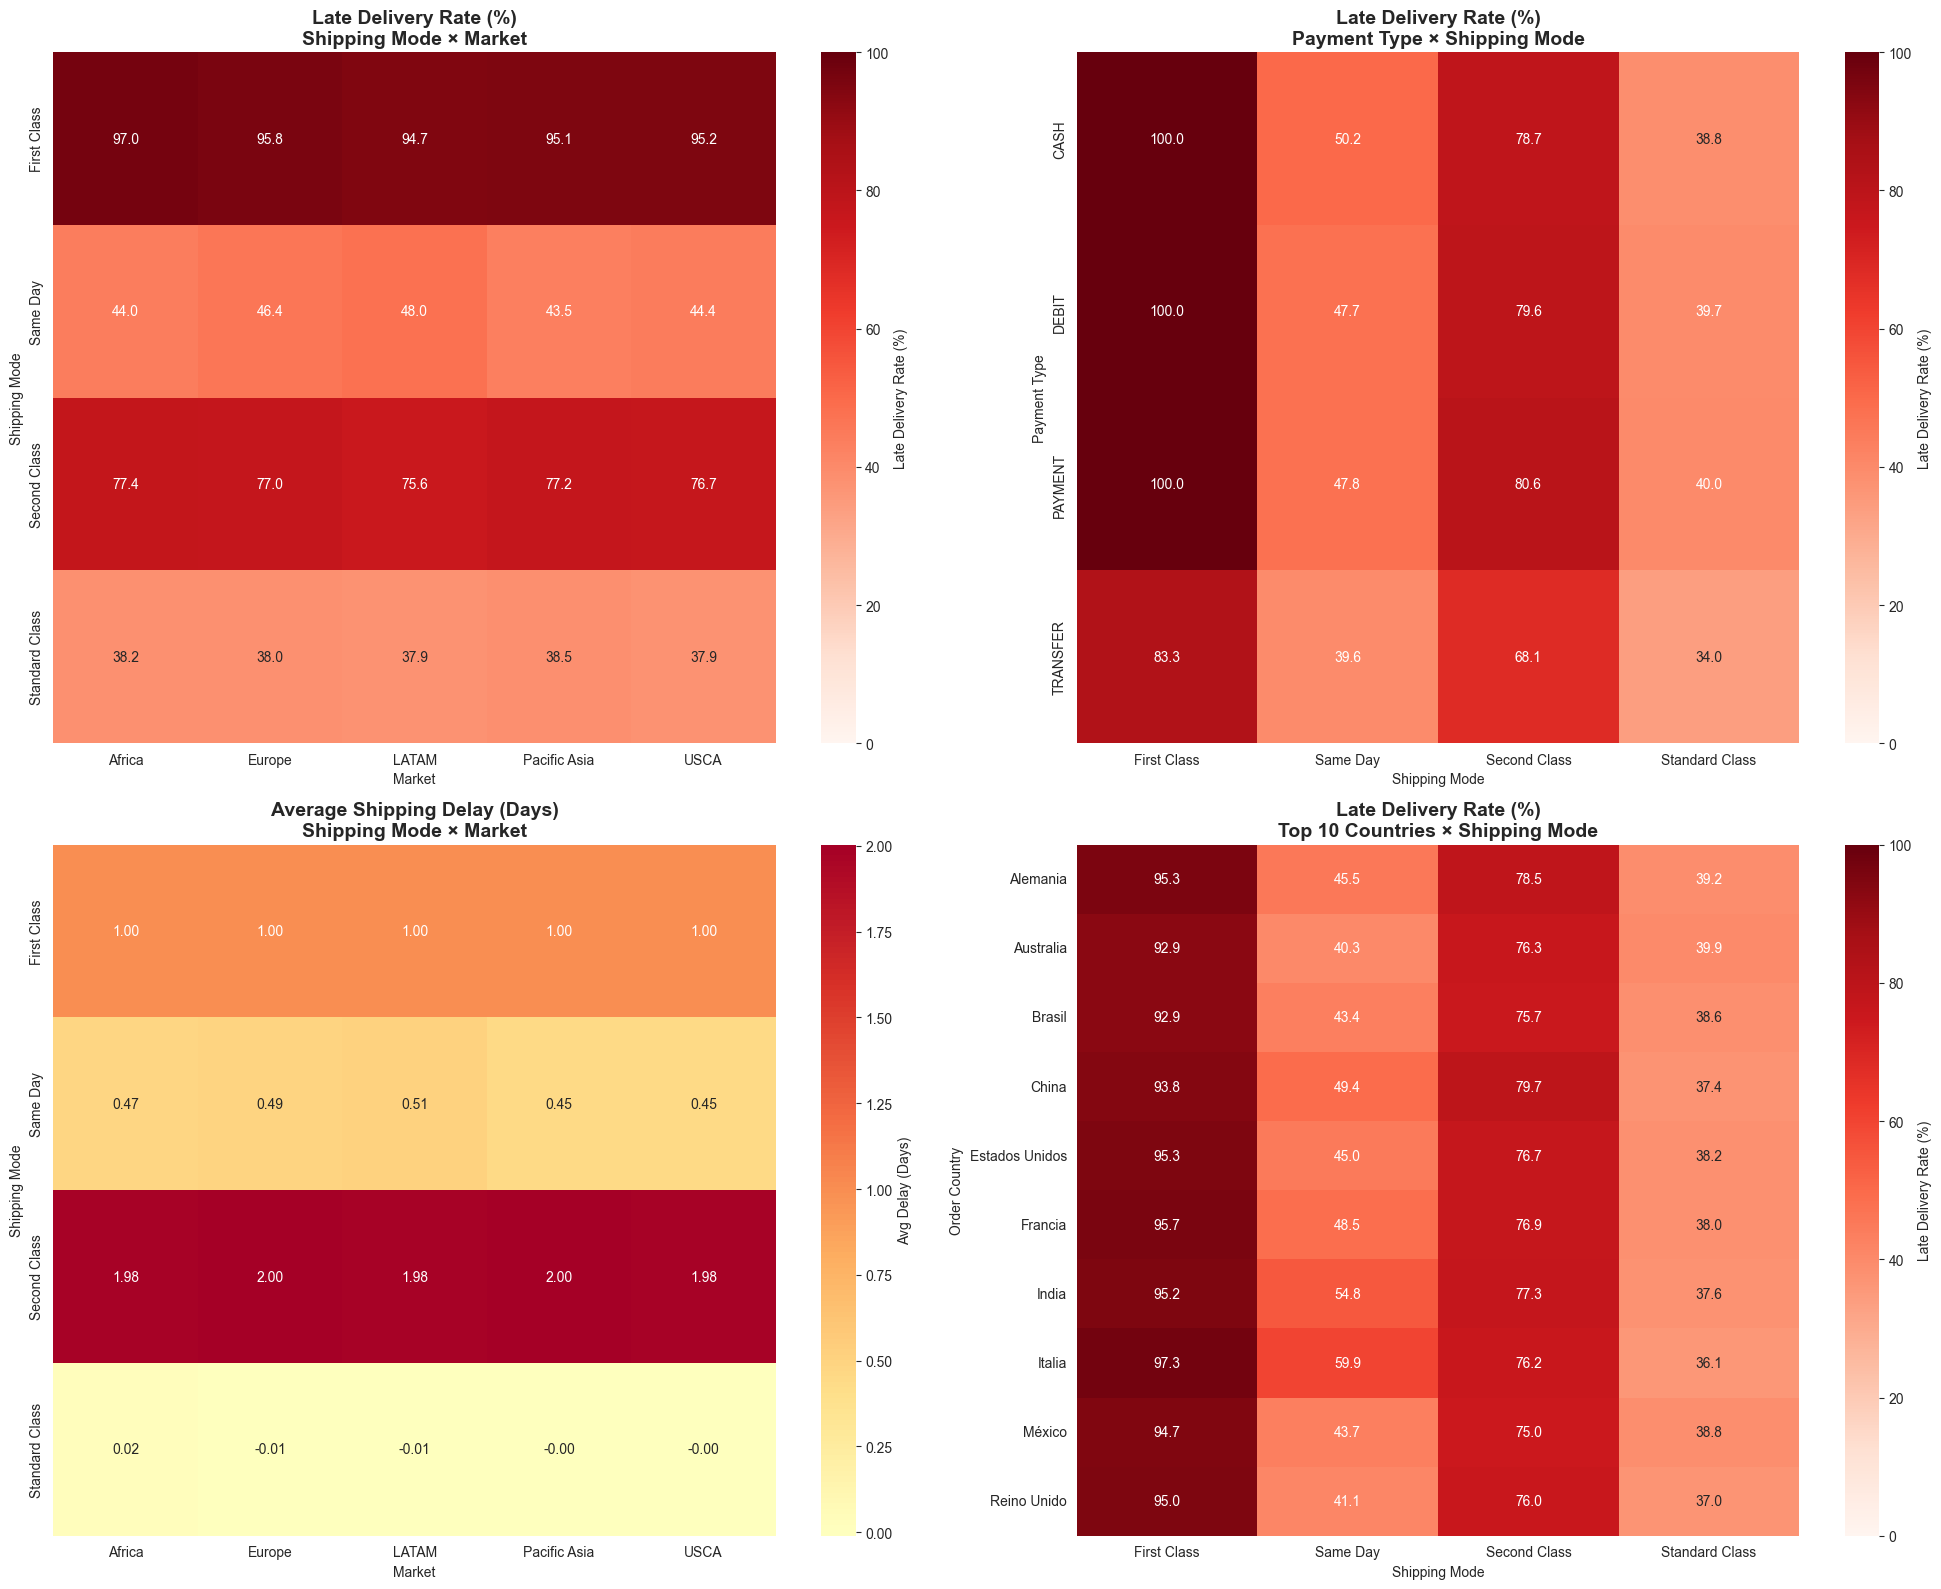

In [67]:
# ============================================================================
# HEATMAP: LATE DELIVERY RATE BY MULTIPLE FACTORS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Late Delivery Rate: Shipping Mode × Market
ax1 = axes[0, 0]
late_shipping_market = supply_chain_df.pivot_table(
    values='late_delivery_risk',
    index='shipping_mode',
    columns='market',
    aggfunc='mean'
) * 100
sns.heatmap(late_shipping_market, annot=True, fmt='.1f', cmap='Reds', 
            ax=ax1, cbar_kws={'label': 'Late Delivery Rate (%)'}, vmin=0, vmax=100)
ax1.set_title('Late Delivery Rate (%)\nShipping Mode × Market', fontsize=14, fontweight='bold')
ax1.set_xlabel('Market')
ax1.set_ylabel('Shipping Mode')

# 2. Late Delivery Rate: Payment Type × Shipping Mode
ax2 = axes[0, 1]
late_payment_shipping = supply_chain_df.pivot_table(
    values='late_delivery_risk',
    index='type',
    columns='shipping_mode',
    aggfunc='mean'
) * 100
sns.heatmap(late_payment_shipping, annot=True, fmt='.1f', cmap='Reds', 
            ax=ax2, cbar_kws={'label': 'Late Delivery Rate (%)'}, vmin=0, vmax=100)
ax2.set_title('Late Delivery Rate (%)\nPayment Type × Shipping Mode', fontsize=14, fontweight='bold')
ax2.set_xlabel('Shipping Mode')
ax2.set_ylabel('Payment Type')

# 3. Average Shipping Delay: Shipping Mode × Market
ax3 = axes[1, 0]
delay_shipping_market = supply_chain_df.pivot_table(
    values='shipping_delay',
    index='shipping_mode',
    columns='market',
    aggfunc='mean'
)
sns.heatmap(delay_shipping_market, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            ax=ax3, cbar_kws={'label': 'Avg Delay (Days)'}, center=0)
ax3.set_title('Average Shipping Delay (Days)\nShipping Mode × Market', fontsize=14, fontweight='bold')
ax3.set_xlabel('Market')
ax3.set_ylabel('Shipping Mode')

# 4. Late Delivery Rate: Top 10 Countries × Shipping Mode
ax4 = axes[1, 1]
top_countries = supply_chain_df['order_country'].value_counts().head(10).index
late_country_shipping = supply_chain_df[supply_chain_df['order_country'].isin(top_countries)].pivot_table(
    values='late_delivery_risk',
    index='order_country',
    columns='shipping_mode',
    aggfunc='mean'
) * 100
sns.heatmap(late_country_shipping, annot=True, fmt='.1f', cmap='Reds', 
            ax=ax4, cbar_kws={'label': 'Late Delivery Rate (%)'}, vmin=0, vmax=100)
ax4.set_title('Late Delivery Rate (%)\nTop 10 Countries × Shipping Mode', fontsize=14, fontweight='bold')
ax4.set_xlabel('Shipping Mode')
ax4.set_ylabel('Order Country')

plt.tight_layout()
plt.show()


COMPARISON: LATE VS ON-TIME DELIVERIES

                 Metric  Late Deliveries  On-Time Deliveries
                 Count     98977.000000        81542.000000
       Avg Actual Days         4.089253            2.779561
    Avg Scheduled Days         2.471069            3.491146
             Avg Delay         1.618184           -0.711584
Avg Sales per Customer       182.694518          183.609025
     Avg Product Price       140.956665          141.567424


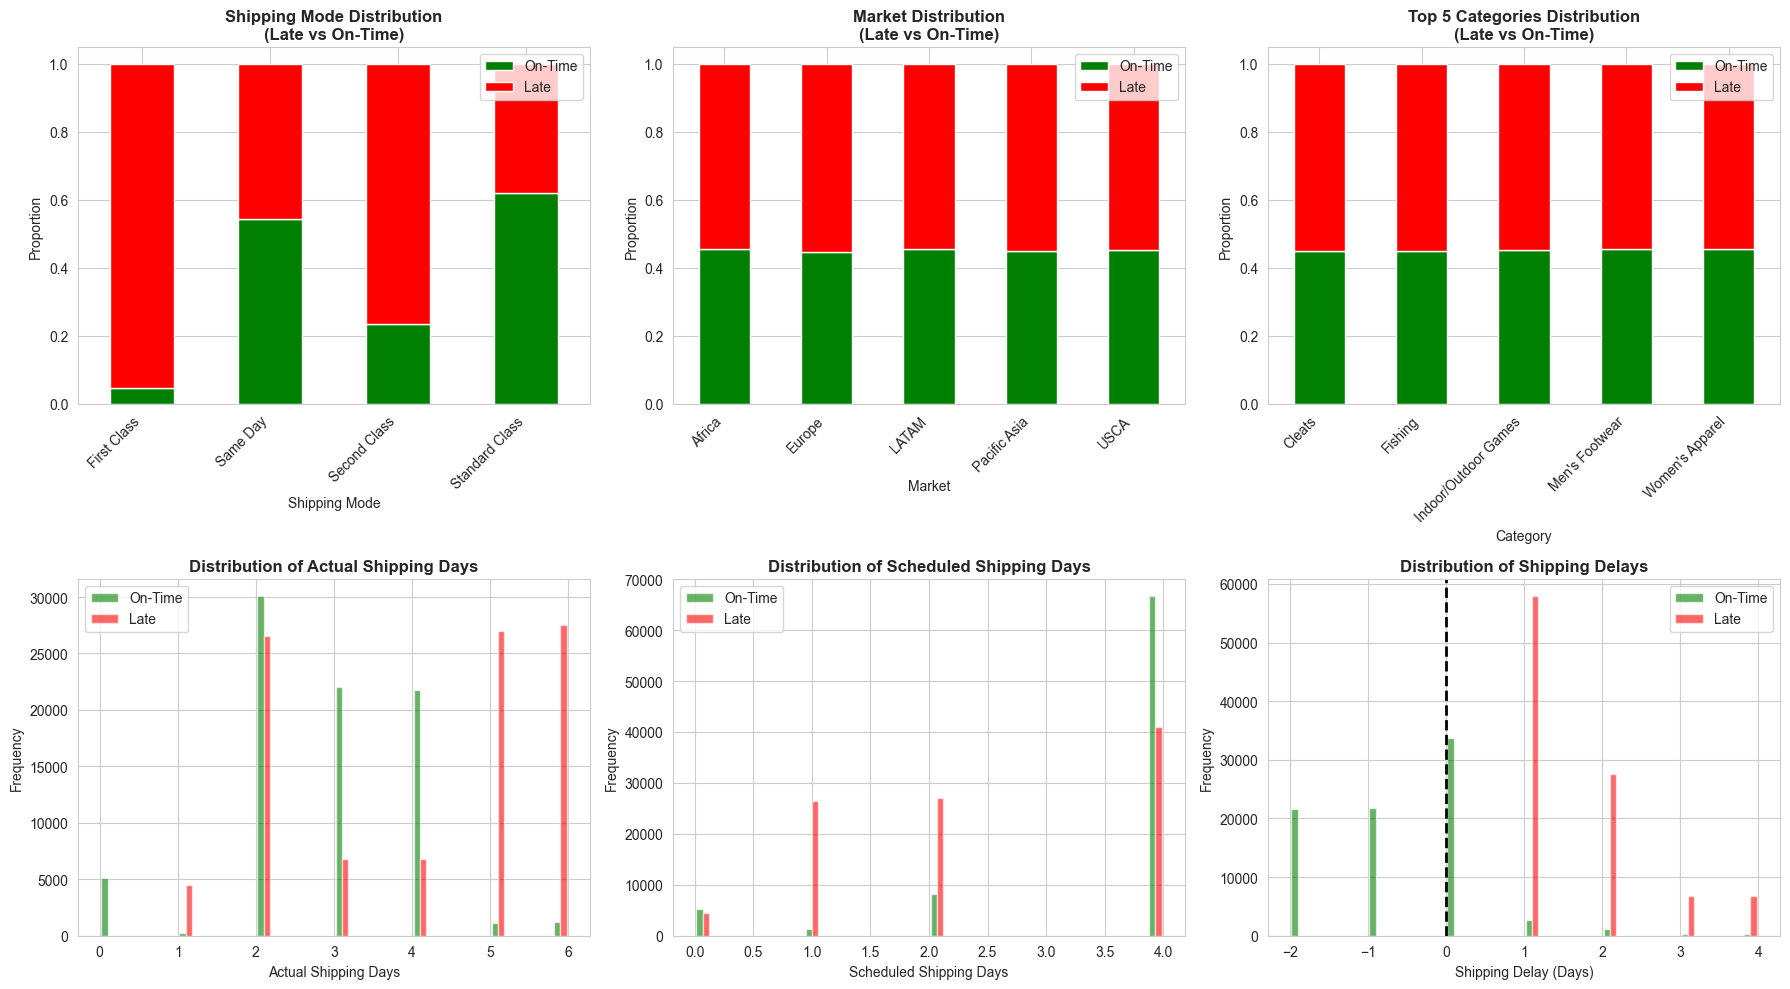

In [68]:
# ============================================================================
# ROOT CAUSE ANALYSIS FOR SHIPPING DELAYS
# ============================================================================

# Compare late vs on-time deliveries
print("\n" + "=" * 100)
print("COMPARISON: LATE VS ON-TIME DELIVERIES")
print("=" * 100)

late_df = supply_chain_df[supply_chain_df['late_delivery_risk'] == 1]
ontime_df = supply_chain_df[supply_chain_df['late_delivery_risk'] == 0]

comparison_data = {
    'Metric': [
        'Count',
        'Avg Actual Days',
        'Avg Scheduled Days',
        'Avg Delay',
        'Avg Sales per Customer',
        'Avg Product Price'
    ],
    'Late Deliveries': [
        len(late_df),
        late_df['days_for_shipping_real'].mean(),
        late_df['days_for_shipment_scheduled'].mean(),
        late_df['shipping_delay'].mean(),
        late_df['sales_per_customer'].mean(),
        late_df['product_price'].mean()
    ],
    'On-Time Deliveries': [
        len(ontime_df),
        ontime_df['days_for_shipping_real'].mean(),
        ontime_df['days_for_shipment_scheduled'].mean(),
        ontime_df['shipping_delay'].mean(),
        ontime_df['sales_per_customer'].mean(),
        ontime_df['product_price'].mean()
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n", comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Shipping Mode
ax1 = axes[0, 0]
pd.crosstab(supply_chain_df['late_delivery_risk'], supply_chain_df['shipping_mode'], normalize='columns').T.plot(
    kind='bar', stacked=True, ax=ax1, color=['green', 'red'])
ax1.set_title('Shipping Mode Distribution\n(Late vs On-Time)', fontweight='bold')
ax1.set_xlabel('Shipping Mode')
ax1.set_ylabel('Proportion')
ax1.legend(['On-Time', 'Late'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Market
ax2 = axes[0, 1]
pd.crosstab(supply_chain_df['late_delivery_risk'], supply_chain_df['market'], normalize='columns').T.plot(
    kind='bar', stacked=True, ax=ax2, color=['green', 'red'])
ax2.set_title('Market Distribution\n(Late vs On-Time)', fontweight='bold')
ax2.set_xlabel('Market')
ax2.set_ylabel('Proportion')
ax2.legend(['On-Time', 'Late'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Category (Top 5)
ax3 = axes[0, 2]
top_5_categories = supply_chain_df['category_name'].value_counts().head(5).index
category_late = supply_chain_df[supply_chain_df['category_name'].isin(top_5_categories)]
pd.crosstab(category_late['late_delivery_risk'], category_late['category_name'], normalize='columns').T.plot(
    kind='bar', stacked=True, ax=ax3, color=['green', 'red'])
ax3.set_title('Top 5 Categories Distribution\n(Late vs On-Time)', fontweight='bold')
ax3.set_xlabel('Category')
ax3.set_ylabel('Proportion')
ax3.legend(['On-Time', 'Late'])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Actual Shipping Days Distribution
ax4 = axes[1, 0]
ax4.hist([ontime_df['days_for_shipping_real'], late_df['days_for_shipping_real']], 
         bins=30, label=['On-Time', 'Late'], color=['green', 'red'], alpha=0.6)
ax4.set_xlabel('Actual Shipping Days')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Actual Shipping Days', fontweight='bold')
ax4.legend()

# Scheduled Shipping Days Distribution
ax5 = axes[1, 1]
ax5.hist([ontime_df['days_for_shipment_scheduled'], late_df['days_for_shipment_scheduled']], 
         bins=30, label=['On-Time', 'Late'], color=['green', 'red'], alpha=0.6)
ax5.set_xlabel('Scheduled Shipping Days')
ax5.set_ylabel('Frequency')
ax5.set_title('Distribution of Scheduled Shipping Days', fontweight='bold')
ax5.legend()

# Shipping Delay Distribution
ax6 = axes[1, 2]
ax6.hist([ontime_df['shipping_delay'], late_df['shipping_delay']], 
         bins=30, label=['On-Time', 'Late'], color=['green', 'red'], alpha=0.6)
ax6.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax6.set_xlabel('Shipping Delay (Days)')
ax6.set_ylabel('Frequency')
ax6.set_title('Distribution of Shipping Delays', fontweight='bold')
ax6.legend()

plt.tight_layout()
plt.show()


TOP PROBLEM AREAS FOR LATE DELIVERIES

--- BY SHIPPING MODE ---
                Late Count  Late Rate  Total Orders
shipping_mode                                      
First Class          26513       95.3         27814
Second Class         26987       76.6         35216
Same Day              4454       45.7          9737
Standard Class       41023       38.1        107752

--- BY MARKET ---
              Late Count  Late Rate  Total Orders  Avg Delay (Days)
market                                                             
Europe             27743       55.2         50252             0.571
Pacific Asia       22712       55.0         41260             0.569
USCA               14138       54.8         25799             0.569
Africa              6340       54.6         11614             0.560
LATAM              28044       54.4         51594             0.558

--- BY ORDER COUNTRY (TOP 15) ---
                      Late Count  Late Rate  Total Orders  Avg Delay (Days)
order_country    

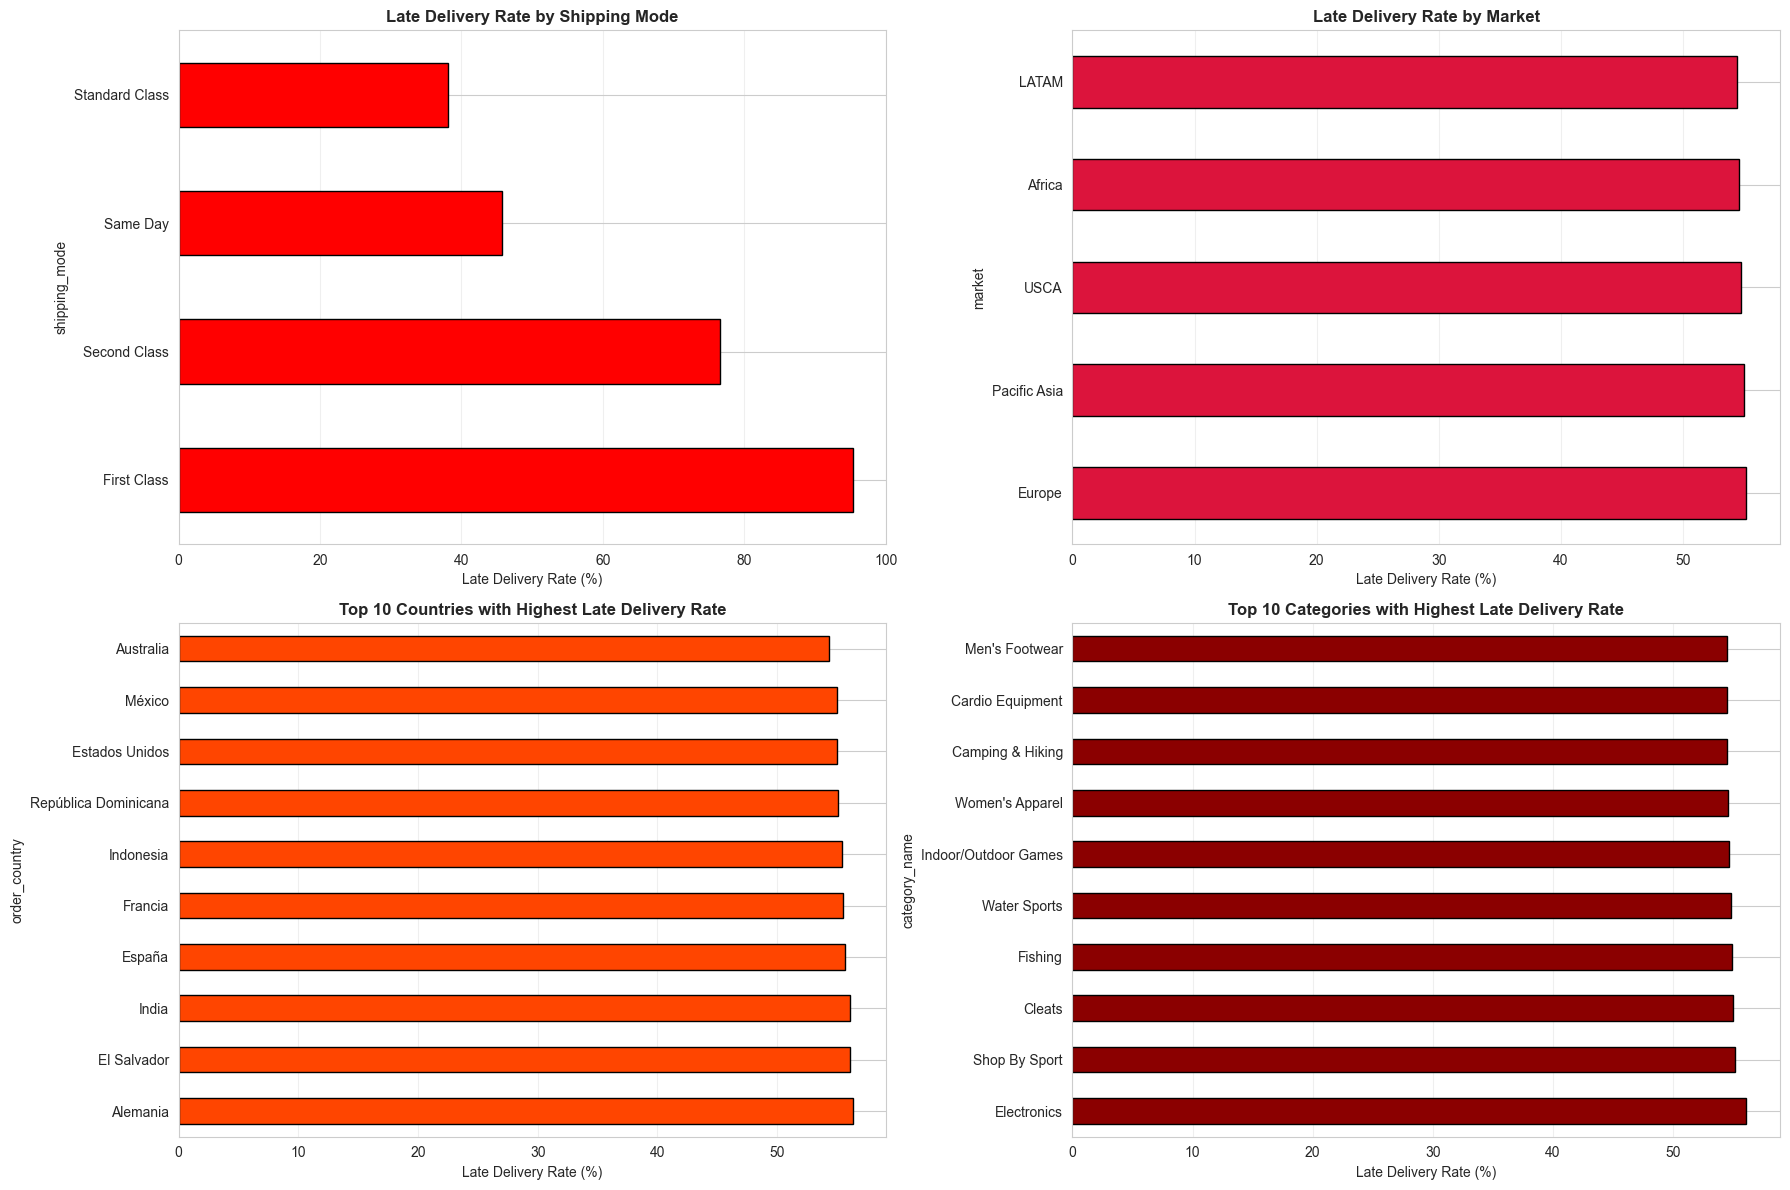

In [69]:
# ============================================================================
# IDENTIFY TOP PROBLEM AREAS
# ============================================================================

print("\n" + "=" * 100)
print("TOP PROBLEM AREAS FOR LATE DELIVERIES")
print("=" * 100)

# By Shipping Mode
print("\n--- BY SHIPPING MODE ---")
shipping_mode_analysis = supply_chain_df.groupby('shipping_mode').agg({
    'late_delivery_risk': ['sum', 'mean', 'count']
}).round(3)
shipping_mode_analysis.columns = ['Late Count', 'Late Rate', 'Total Orders']
shipping_mode_analysis['Late Rate'] = shipping_mode_analysis['Late Rate'] * 100
shipping_mode_analysis = shipping_mode_analysis.sort_values('Late Rate', ascending=False)
print(shipping_mode_analysis)

# By Market
print("\n--- BY MARKET ---")
market_analysis = supply_chain_df.groupby('market').agg({
    'late_delivery_risk': ['sum', 'mean', 'count'],
    'shipping_delay': 'mean'
}).round(3)
market_analysis.columns = ['Late Count', 'Late Rate', 'Total Orders', 'Avg Delay (Days)']
market_analysis['Late Rate'] = market_analysis['Late Rate'] * 100
market_analysis = market_analysis.sort_values('Late Rate', ascending=False)
print(market_analysis)

# By Order Country (Top 15)
print("\n--- BY ORDER COUNTRY (TOP 15) ---")
top_15_countries = supply_chain_df['order_country'].value_counts().head(15).index
country_analysis = supply_chain_df[supply_chain_df['order_country'].isin(top_15_countries)].groupby('order_country').agg({
    'late_delivery_risk': ['sum', 'mean', 'count'],
    'shipping_delay': 'mean'
}).round(3)
country_analysis.columns = ['Late Count', 'Late Rate', 'Total Orders', 'Avg Delay (Days)']
country_analysis['Late Rate'] = country_analysis['Late Rate'] * 100
country_analysis = country_analysis.sort_values('Late Rate', ascending=False)
print(country_analysis)

# By Category (Top 10)
print("\n--- BY CATEGORY (TOP 10) ---")
top_10_categories = supply_chain_df['category_name'].value_counts().head(10).index
category_analysis = supply_chain_df[supply_chain_df['category_name'].isin(top_10_categories)].groupby('category_name').agg({
    'late_delivery_risk': ['sum', 'mean', 'count'],
    'shipping_delay': 'mean'
}).round(3)
category_analysis.columns = ['Late Count', 'Late Rate', 'Total Orders', 'Avg Delay (Days)']
category_analysis['Late Rate'] = category_analysis['Late Rate'] * 100
category_analysis = category_analysis.sort_values('Late Rate', ascending=False)
print(category_analysis)

# Visualize top problem areas
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Shipping Mode
ax1 = axes[0, 0]
shipping_mode_analysis['Late Rate'].plot(kind='barh', ax=ax1, color='red', edgecolor='black')
ax1.set_xlabel('Late Delivery Rate (%)')
ax1.set_title('Late Delivery Rate by Shipping Mode', fontweight='bold', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# Market
ax2 = axes[0, 1]
market_analysis['Late Rate'].plot(kind='barh', ax=ax2, color='crimson', edgecolor='black')
ax2.set_xlabel('Late Delivery Rate (%)')
ax2.set_title('Late Delivery Rate by Market', fontweight='bold', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

# Country (Top 10 worst)
ax3 = axes[1, 0]
country_analysis.head(10)['Late Rate'].plot(kind='barh', ax=ax3, color='orangered', edgecolor='black')
ax3.set_xlabel('Late Delivery Rate (%)')
ax3.set_title('Top 10 Countries with Highest Late Delivery Rate', fontweight='bold', fontsize=12)
ax3.grid(axis='x', alpha=0.3)

# Category (Top 10 worst)
ax4 = axes[1, 1]
category_analysis.head(10)['Late Rate'].plot(kind='barh', ax=ax4, color='darkred', edgecolor='black')
ax4.set_xlabel('Late Delivery Rate (%)')
ax4.set_title('Top 10 Categories with Highest Late Delivery Rate', fontweight='bold', fontsize=12)
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

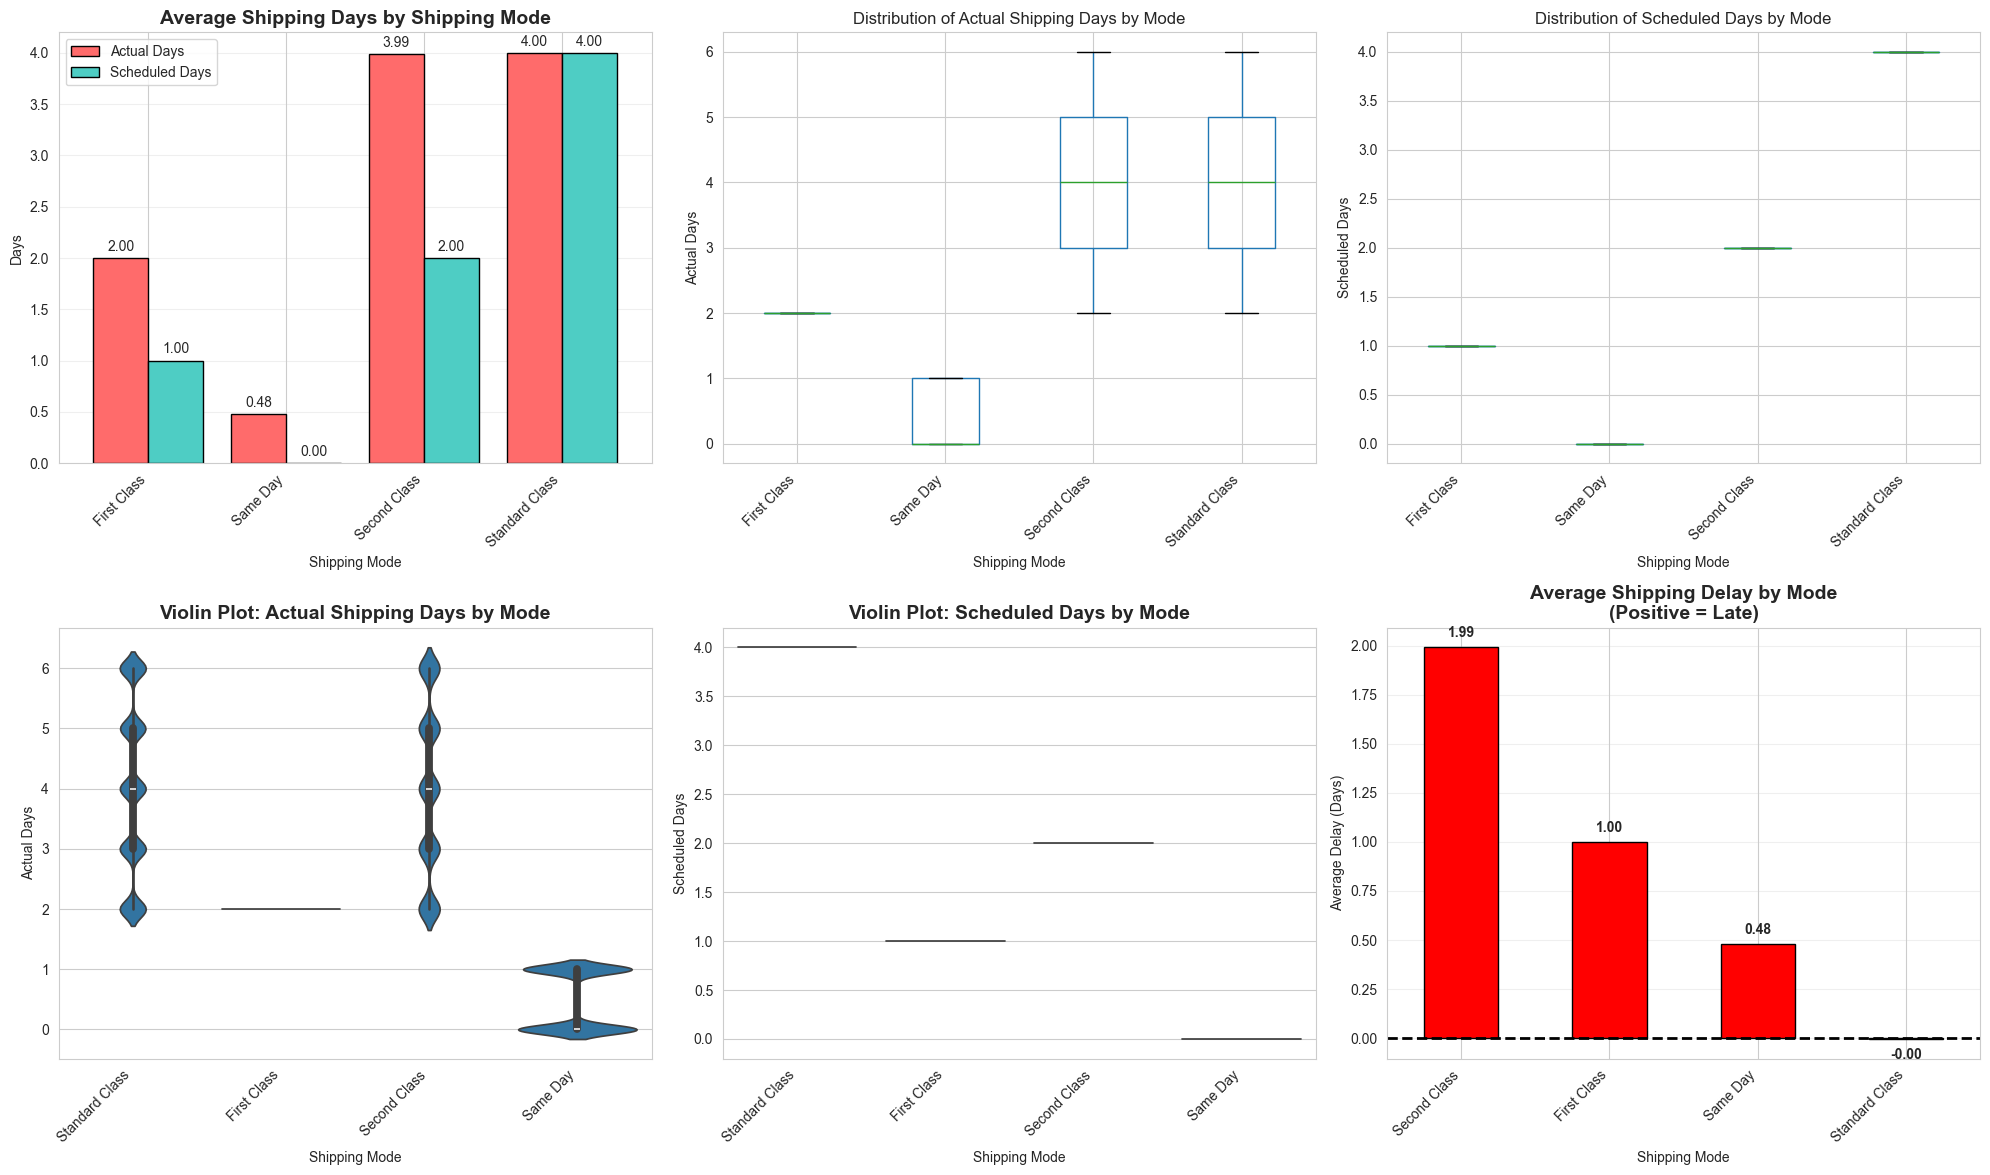

In [70]:


# ============================================================================
# SHIPPING MODE VS ACTUAL/SCHEDULED DAYS ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(20, 12))

# 1. Average Days by Shipping Mode - Bar Chart
ax1 = plt.subplot(2, 3, 1)
shipping_days = supply_chain_df.groupby('shipping_mode')[['days_for_shipping_real', 'days_for_shipment_scheduled']].mean()
shipping_days.plot(kind='bar', ax=ax1, color=['#ff6b6b', '#4ecdc4'], edgecolor='black', width=0.8)
plt.title('Average Shipping Days by Shipping Mode', fontsize=14, fontweight='bold')
plt.xlabel('Shipping Mode')
plt.ylabel('Days')
plt.legend(['Actual Days', 'Scheduled Days'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', padding=3)

# 2. Box Plot - Actual Days by Shipping Mode
ax2 = plt.subplot(2, 3, 2)
supply_chain_df.boxplot(column='days_for_shipping_real', by='shipping_mode', ax=ax2)
plt.sca(ax2)
plt.xticks(rotation=45, ha='right')
ax2.set_title('Distribution of Actual Shipping Days by Mode')
ax2.set_xlabel('Shipping Mode')
ax2.set_ylabel('Actual Days')
plt.suptitle('')

# 3. Box Plot - Scheduled Days by Shipping Mode
ax3 = plt.subplot(2, 3, 3)
supply_chain_df.boxplot(column='days_for_shipment_scheduled', by='shipping_mode', ax=ax3)
plt.sca(ax3)
plt.xticks(rotation=45, ha='right')
ax3.set_title('Distribution of Scheduled Days by Mode')
ax3.set_xlabel('Shipping Mode')
ax3.set_ylabel('Scheduled Days')
plt.suptitle('')

# 4. Violin Plot - Actual Days
ax4 = plt.subplot(2, 3, 4)
sns.violinplot(data=supply_chain_df, x='shipping_mode', y='days_for_shipping_real', ax=ax4)
ax4.set_title('Violin Plot: Actual Shipping Days by Mode', fontsize=14, fontweight='bold')
ax4.set_xlabel('Shipping Mode')
ax4.set_ylabel('Actual Days')
plt.xticks(rotation=45, ha='right')

# 5. Violin Plot - Scheduled Days
ax5 = plt.subplot(2, 3, 5)
sns.violinplot(data=supply_chain_df, x='shipping_mode', y='days_for_shipment_scheduled', ax=ax5)
ax5.set_title('Violin Plot: Scheduled Days by Mode', fontsize=14, fontweight='bold')
ax5.set_xlabel('Shipping Mode')
ax5.set_ylabel('Scheduled Days')
plt.xticks(rotation=45, ha='right')

# 6. Shipping Delay by Mode
ax6 = plt.subplot(2, 3, 6)
supply_chain_df['shipping_delay'] = supply_chain_df['days_for_shipping_real'] - supply_chain_df['days_for_shipment_scheduled']
avg_delay = supply_chain_df.groupby('shipping_mode')['shipping_delay'].mean().sort_values(ascending=False)
colors = ['red' if x > 0 else 'green' for x in avg_delay.values]
avg_delay.plot(kind='bar', ax=ax6, color=colors, edgecolor='black')
plt.title('Average Shipping Delay by Mode\n(Positive = Late)', fontsize=14, fontweight='bold')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Delay (Days)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(avg_delay.values):
    plt.text(i, v + 0.05 if v > 0 else v - 0.1, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()